# Data loading
We will begin with a subset of dataset from @zeller2014potential. This dataset is from the fecal samples collected from **156 French patients**. In this section, we will load the dataset and explore its basic characteristics.

We will also extract the bacterial species column names. Those column names starting with `k__Bacteria` represents bacterial species.

In [1]:
import pandas as pd

# loading tab-seperated data file using pandas and transposing it
data = pd.read_csv('Nine_CRC_cohorts_taxon_profiles.tsv',sep='\t',header=None).T

# setting the first row as column names and then removing it
data = data.rename(columns=data.loc[0]).drop(0, axis=0)

# accessing Zeller et al., 2014 dataset
zeller_db = data.loc[data['dataset_name'] == 'ZellerG_2014',:]

# fetching microbacterial organism information-related columns
bacteria_colnames = [col for col in data.columns if 'k__Bacteria' in col]

# metadata colnames
metadata_colnames = ['dataset_name', 'sampleID', 'subjectID', 'body_site', 'study_condition',
                     'disease', 'age', 'age_category', 'gender', 'country','ajcc','alcohol',
                     'antibiotics_current_use','curator','disease_subtype','ever_smoke','fobt',
                     'hba1c','hdl','ldl','location','BMI']

print('Total features: ', zeller_db.shape[1])

Total features:  829


For the rest of our analysis, we will focus on five metadata features along with OTUs. Those features are `age`, `gender`, `BMI`, `study_condition` and `ajcc`. 

## Age, BMI and gender distribution
@fig-dist shows distributions of age, BMI, and gender of patients across different study conditions: control, adenoma, and CRC. 

* CRC patients are **slightly older than control cases.**
* There is **an increase in BMI for adenoma compared to control cases.**
* There are more **males with CRC than females.**


<Axes: xlabel='study_condition', ylabel='count'>

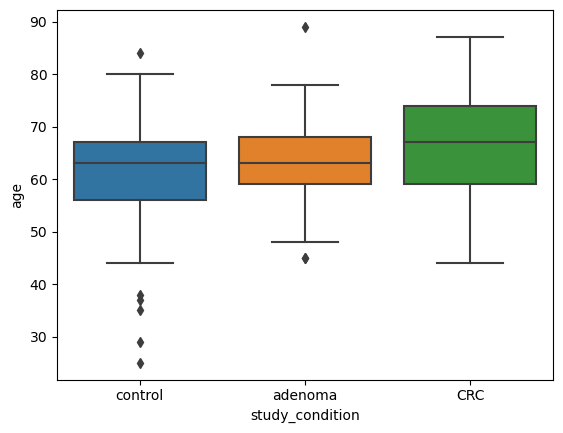

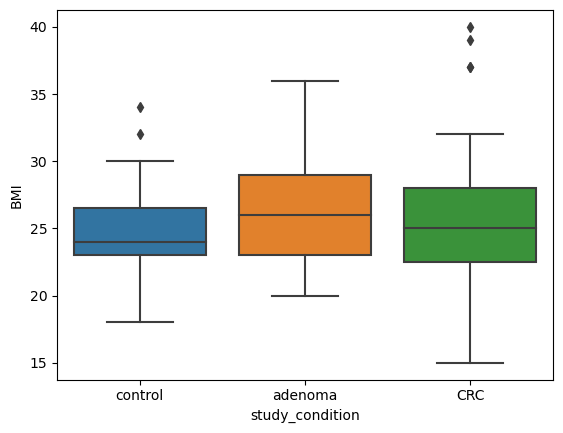

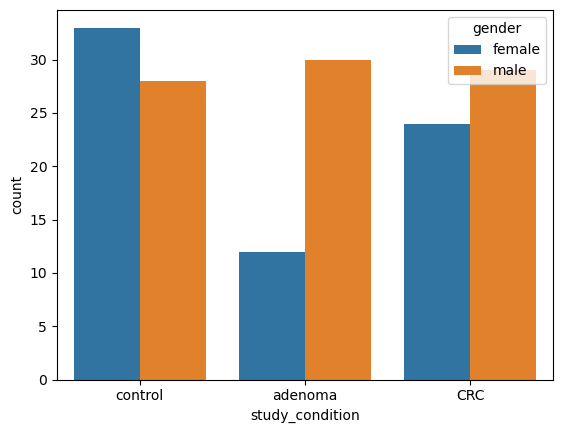

In [9]:
#| echo: false
#| label: fig-dist
#| fig-cap: "Distribution across study conditions"
#| fig-subcap: 
#|   - "Age distribution"
#|   - "BMI distribution"
#|   - "Gender distribution"
#| layout-ncol: 3

import seaborn as sns
import matplotlib.pyplot as plt

zeller_db.loc[:,'age'] = pd.to_numeric(zeller_db['age'], errors="coerce")
zeller_db.loc[:,'BMI'] = pd.to_numeric(zeller_db['BMI'], errors="coerce")

plt.figure()
sns.boxplot(data = zeller_db, x='study_condition',y='age')

plt.figure()
sns.boxplot(data = zeller_db, x='study_condition',y='BMI')

plt.figure()
sns.countplot(data = zeller_db, x='study_condition',hue='gender')